In [1]:
from SIRModel import *
import matplotlib.pyplot as plt
import pandas as pd
# calculate percentage differences, and compare

us_records = pd.read_csv("./data/US_counties_COVID19_health_weather_data.csv")



[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [226]:
absolute_difference_array = []

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
142822,2020-05-14,Sublette,Wyoming,56035,3,0,no,no,42.766905,-109.914721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142823,2020-05-14,Sweetwater,Wyoming,56037,21,0,no,no,41.659538,-108.879567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142824,2020-05-14,Teton,Wyoming,56039,99,1,no,no,43.934776,-110.589759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142825,2020-05-14,Uinta,Wyoming,56041,9,0,no,no,41.287648,-110.547639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142826,2020-05-14,Washakie,Wyoming,56043,7,0,no,no,43.904970,-107.682819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
counties = us_records.county.unique()
county_specific = {elem: pd.DataFrame for elem in counties}
for county in county_specific.keys():
    new_county = us_records[:][us_records.county == county]
    states = new_county.state.unique()
    county_specific[county] = new_county[:][new_county.state == states[0]]

In [3]:
len(counties)

1720

In [4]:
county_name = "Etowah"
county = county_specific[county_name]

In [5]:
pct_change = county["cases"].pct_change()
pct_change_deaths = county["deaths"].pct_change()
stay_at_home_order_index = len(county[county.stay_at_home_effective == "no"].index)
pct_change_deaths.head()

10699   NaN
12212   NaN
13849   NaN
15604   NaN
17463   NaN
Name: deaths, dtype: float64

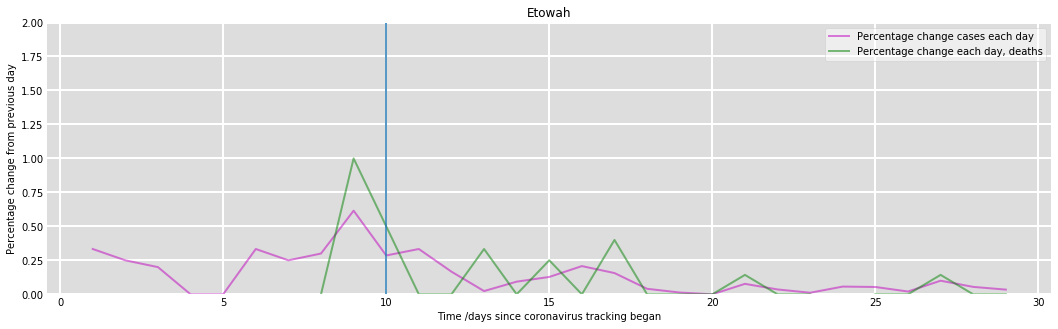

In [6]:
range_start = stay_at_home_order_index - 10
range_end = stay_at_home_order_index+20
stay_at_home_difference = pct_change[range_start:range_end]
stay_at_home_difference_deaths = pct_change_deaths[range_start:range_end]
fig = plt.figure(facecolor='w', figsize=(18,5))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True, title=county_name)
ax.plot(range(range_start,range_end), stay_at_home_difference, 'm', alpha=0.5, lw=2, label="Percentage change cases each day")
ax.plot(range(range_start,range_end), stay_at_home_difference_deaths, 'g', alpha=0.5, lw=2, label="Percentage change each day, deaths")
ax.axvline(stay_at_home_order_index)
ax.set_xlabel('Time /days since coronavirus tracking began')
ax.set_ylabel('Percentage change from previous day')
ax.set_ylim(0, 2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [266]:
county_avg = []
larger_range = 20
for key in county_specific:
    county = county_specific[key]
    if county.date_stay_at_home_announced.isnull().sum() > 0:
        continue
    pct_change = county["cases"].pct_change()
    pct_change_deaths = county["deaths"].pct_change()
    county_row = []
    county_row.append(key)

    stay_at_home_order_index = len(county[county.stay_at_home_effective == "no"].index)
    if stay_at_home_order_index == 0 or stay_at_home_order_index == len(county.index):
        continue

    range_start = stay_at_home_order_index - 5 if stay_at_home_order_index - 5 >= 0 else 0
    range_end = stay_at_home_order_index + 5 if stay_at_home_order_index + 5 < len(pct_change) else len(pct_change)-1
    stay_at_home_difference_before = pct_change[range_start:stay_at_home_order_index]
    stay_at_home_difference_after = pct_change[stay_at_home_order_index:range_end]
    stay_at_home_difference_deaths_before = pct_change_deaths[range_start:stay_at_home_order_index]
    stay_at_home_difference_deaths_after = pct_change_deaths[stay_at_home_order_index:range_end]

    ans1 = sum(stay_at_home_difference_before) / (stay_at_home_order_index - range_start)
    ans2 = sum(stay_at_home_difference_after) / (range_end - stay_at_home_order_index)
    if not ans1 or not ans2:
        continue
    county_row.append(ans1)
    county_row.append(ans2)

    range_start = stay_at_home_order_index - larger_range if stay_at_home_order_index - larger_range >= 0 else 0
    range_end = stay_at_home_order_index + larger_range if stay_at_home_order_index + larger_range < len(pct_change) else len(pct_change)-1
    stay_at_home_difference_before = pct_change[range_start:stay_at_home_order_index]
    stay_at_home_difference_after = pct_change[stay_at_home_order_index:range_end]
    stay_at_home_difference_deaths_before = pct_change_deaths[range_start:stay_at_home_order_index]
    stay_at_home_difference_deaths_after = pct_change_deaths[stay_at_home_order_index:range_end]
    if stay_at_home_difference_before.isnull().sum() > 0:
        continue
    ans1 = sum(stay_at_home_difference_before) / (stay_at_home_order_index - range_start)
    ans2 = sum(stay_at_home_difference_after) / (range_end - stay_at_home_order_index)
    if not ans1 or not ans2:
        continue
    county_row.append(ans1)
    county_row.append(ans2)
    

    county_avg.append(county_row)

df = pd.DataFrame(data=np.array(county_avg), columns=["county", "pre_x", "post_x", f'pre_{larger_range}', f'post_{larger_range}'])
df.head()


,county,pre_x,post_x,pre_20,post_20
0,Snohomish,0.12666696827842747,0.13955611177200464,0.31028944560971256,0.07113467556847997
1,Cook,0.4232307319882912,0.2854064681158984,0.29755523555344887,0.1852456591665672
2,Orange,0.27035682370367964,0.24441160957546257,0.26925587259258654,0.17227688467298735
3,Maricopa,0.2259814534734653,0.11174332747077642,0.3679582827546909,0.06896172876088967
4,Los Angeles,0.36811299421880117,0.23090057531946676,0.4936683190105602,0.19997277742620126


In [267]:
df = df.set_index("county")
df.head()

,pre_x,post_x,pre_20,post_20
county,,,,
Snohomish,0.12666696827842747,0.13955611177200464,0.31028944560971256,0.07113467556847997
Cook,0.4232307319882912,0.2854064681158984,0.29755523555344887,0.1852456591665672
Orange,0.27035682370367964,0.24441160957546257,0.26925587259258654,0.17227688467298735
Maricopa,0.2259814534734653,0.11174332747077642,0.3679582827546909,0.06896172876088967
Los Angeles,0.36811299421880117,0.23090057531946676,0.4936683190105602,0.19997277742620126


In [268]:
df["x_day"] = df["pre_x"] >= df["post_x"]
df[f"{larger_range}_day"] = df[f"pre_{larger_range}"] >= df[f"post_{larger_range}"]

In [269]:
df.sum()["x_day"] / len(df.index)


0.7634408602150538

In [270]:
df.sum()[f"{larger_range}_day"] / len(df.index)

0.967741935483871

In [271]:
len(df.index)

93

In [272]:
(pd.to_numeric(df[f"post_{larger_range}"]) - (pd.to_numeric(df[f"pre_{larger_range}"]))).sort_values()

county
New York City   -0.441366
Shelby          -0.430767
Delaware        -0.382051
Philadelphia    -0.374355
Duval           -0.343845
                   ...   
Wayne           -0.028737
Gregg           -0.004900
Sonoma           0.029305
Spokane          0.049412
Solano           0.090440
Length: 93, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b53d504a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b53d50b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b53d50160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b53d5a208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b53d5a550>],
 'means': []}

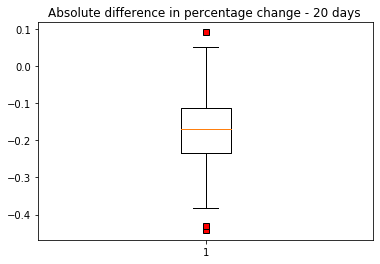

In [273]:
def num(df):
    return pd.to_numeric(df)
absolute_difference =  pd.to_numeric(df[f"post_{larger_range}"]) - (pd.to_numeric(df[f"pre_{larger_range}"]))

fig1, ax1 = plt.subplots()
ax1.set_title(f'Absolute difference in percentage change - {larger_range} days ')
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(absolute_difference, flierprops=red_square)


In [274]:
# fig1.savefig(f'absolute_difference_pct_change-{larger_range}days.png')

In [275]:
(len(counties) - len(df.index)) / len(counties)

0.9459302325581396

In [276]:

average_decrease = ((num(df[f"pre_{larger_range}"]) - num(df[f"post_{larger_range}"])) / num(df[f"pre_{larger_range}"]))
#Average decrease
absolute_difference_array.append(average_decrease)

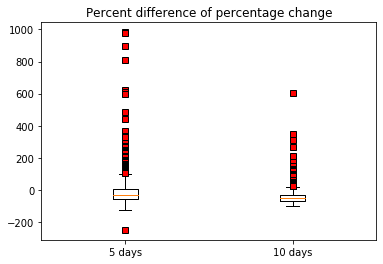

In [297]:

fig1, ax1 = plt.subplots()
ax1.set_title(f'Percent difference of percentage change')
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot([-x.sort_values()[1:] * 100 for x in absolute_difference_array[0:2]], flierprops=red_square, labels=["5 days", "10 days"] )
fig1.savefig("percent_difference_pct_change-5-10days.png")

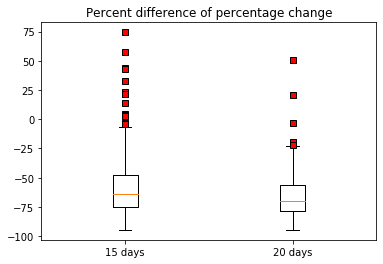

In [298]:
fig2, ax2 = plt.subplots()
ax2.set_title(f'Percent difference of percentage change')
red_square = dict(markerfacecolor='r', marker='s')
ax2.boxplot([-x.sort_values()[1:] * 100 for x in absolute_difference_array[2:]], flierprops=red_square, labels=["15 days", "20 days"] )
fig2.savefig("percent_difference_pct_change-15-20days.png")

In [299]:
absolute_difference_array[0].sort_values()[1:]

county
Quitman        -9.828571
Randolph       -9.763820
Upson          -8.998718
Chesterfield   -8.085257
Peach          -6.256044
                  ...   
Limestone       0.902495
Catawba         0.912519
San Benito      0.920000
Moniteau        1.250000
Bullock         2.500000
Length: 607, dtype: float64